In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/TechLabsGroupProject

/content/drive/MyDrive/TechLabsGroupProject


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Use pandas to import the csv file generated using a python script. This csv has information on public repositories from the GitHub API. 

In [ ]:
df = pd.read_csv('gitHubAPIResults2.csv')

Look at the number of columns and rows (shape) and the first 5 entries (head).

In [ ]:
df.shape

(991, 83)

In [ ]:
df.head()

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,keys_url,archive_url,assignees_url,blobs_url,branches_url,collaborators_url,comments_url,commits_url,compare_url,contents_url,contributors_url,deployments_url,downloads_url,assignees_url.1,branches_url.1,events_url,forks_url,git_commits_url,git_refs_url,git_tags_url,git_url,issue_comment_url,issue_events_url,issues_url,keys_url.1,labels_url,languages_url,merges_url,milestones_url,notifications_url,...,stargazers_url,statuses_url,subscribers_url,subscription_url,tags_url,teams_url,trees_url,clone_url,mirror_url,hooks_url,svn_url,homepage,language,forks,forks_count,stargazers_count,watchers_count,watchers,size,default_branch,open_issues,open_issues_count,allow_forking,is_template,license,topics,has_issues,has_projects,has_wiki,has_pages,has_downloads,archived,disabled,visibility,pushed_at,created_at,updated_at,permissions,score,template_repository
0,99826556,MDEwOlJlcG9zaXRvcnk5OTgyNjU1Ng==,scottyjs,stojanovic/scottyjs,False,"{'login': 'stojanovic', 'id': 613478, 'node_id...",https://github.com/stojanovic/scottyjs,Deploy static websites and single page apps to...,False,https://api.github.com/repos/stojanovic/scottyjs,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,git://github.com/stojanovic/scottyjs.git,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://github.com/stojanovic/scottyjs.git,NaN,https://api.github.com/repos/stojanovic/scotty...,https://github.com/stojanovic/scottyjs,http://medium.com/@slobodan/single-command-dep...,JavaScript,36,36,713,713,713,6602,master,12,12,True,False,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...","['aws-s3', 'deployment', 'static-site']",True,True,True,False,True,True,False,public,2021-07-16T14:19:19Z,2017-08-09T15:54:30Z,2021-07-16T14:19:53Z,"{'admin': False, 'maintain': False, 'push': Fa...",1.0,NaN
1,119603782,MDEwOlJlcG9zaXRvcnkxMTk2MDM3ODI=,react-contextual,drcmda/react-contextual,False,"{'login': 'drcmda', 'id': 2223602, 'node_id': ...",https://github.com/drcmda/react-contextual,🚀 react-contextual is a small (less than 1KB) ...,False,https://api.github.com/repos/drcmda/react-cont...,https://api.github.com/repos/drcmda/react-cont...,https://api.github.com/repos/drcmda/react-cont...,https://api.github.com/repos/drcmda/react-cont...,htt

Start to clean the data. Remove the unnecessary columns.

In [ ]:
df.columns

Index(['id', 'node_id', 'name', 'full_name', 'private', 'owner', 'html_url',
       'description', 'fork', 'url', 'keys_url', 'archive_url',
       'assignees_url', 'blobs_url', 'branches_url', 'collaborators_url',
       'comments_url', 'commits_url', 'compare_url', 'contents_url',
       'contributors_url', 'deployments_url', 'downloads_url',
       'assignees_url.1', 'branches_url.1', 'events_url', 'forks_url',
       'git_commits_url', 'git_refs_url', 'git_tags_url', 'git_url',
       'issue_comment_url', 'issue_events_url', 'issues_url', 'keys_url.1',
       'labels_url', 'languages_url', 'merges_url', 'milestones_url',
       'notifications_url', 'pulls_url', 'releases_url', 'ssh_url',
       'stargazers_url', 'statuses_url', 'subscribers_url', 'subscription_url',
       'tags_url', 'teams_url', 'trees_url', 'clone_url', 'mirror_url',
       'hooks_url', 'svn_url', 'homepage', 'language', 'forks', 'forks_count',
       'stargazers_count', 'watchers_count', 'watchers', 'size',
   

In [ ]:
columns_to_keep = ['id', 'name', 'language', 'forks_count', 'stargazers_count', 'watchers_count', 'watchers', 'created_at']
for column_name in df.columns:
  if column_name not in columns_to_keep:
    df.drop(columns=column_name, inplace=True)

df.columns

Index(['id', 'name', 'language', 'forks_count', 'stargazers_count',
       'watchers_count', 'watchers', 'created_at'],
      dtype='object')

Due to how the data was fetched there is a "header" row every 30 entries that must be removed.

In [ ]:
df.head(32)

,id,name,language,forks_count,stargazers_count,watchers_count,watchers,created_at
0,99826556,scottyjs,JavaScript,36,713,713,713,2017-08-09T15:54:30Z
1,119603782,react-contextual,JavaScript,31,646,646,646,2018-01-30T22:41:23Z
2,92927457,alm,PHP,10,636,636,636,2017-05-31T09:10:08Z
3,141927393,unswitch,JavaScript,13,575,575,575,2018-07-22T20:12:08Z
4,135647632,lumin,JavaScript,21,545,545,545,2018-06-01T00:15:32Z
5,95385096,repatch,TypeScript,12,515,515,515,2017-06-25T20:50:11Z
6,77769343,RxFingerPrinter,Java,78,511,511,511,2017-01-01T07:07:12Z
7,93019977,iOS11AdaptationTips,NaN,51,486,486,486,2017-06-01T05:32:13Z
8,175338700,60-and-90-degree-V-Groove-Bit,C++,1,476,476,476,2019-03-13T03:21:39Z
9,190217270,3-Bit-CNC-Starter-Pack,NaN,1,472,472,472,2019-06-04T14:24:04Z


In [ ]:
filt = df['id'] == 'id'
df.drop(index=df[filt].index, inplace=True)

df.head(32)

,id,name,language,forks_count,stargazers_count,watchers_count,watchers,created_at
0,99826556,scottyjs,JavaScript,36,713,713,713,2017-08-09T15:54:30Z
1,119603782,react-contextual,JavaScript,31,646,646,646,2018-01-30T22:41:23Z
2,92927457,alm,PHP,10,636,636,636,2017-05-31T09:10:08Z
3,141927393,unswitch,JavaScript,13,575,575,575,2018-07-22T20:12:08Z
4,135647632,lumin,JavaScript,21,545,545,545,2018-06-01T00:15:32Z
5,95385096,repatch,TypeScript,12,515,515,515,2017-06-25T20:50:11Z
6,77769343,RxFingerPrinter,Java,78,511,511,511,2017-01-01T07:07:12Z
7,93019977,iOS11AdaptationTips,NaN,51,486,486,486,2017-06-01T05:32:13Z
8,175338700,60-and-90-degree-V-Groove-Bit,C++,1,476,476,476,2019-03-13T03:21:39Z
9,190217270,3-Bit-CNC-Starter-Pack,NaN,1,472,472,472,2019-06-04T14:24:04Z


Check the current shape of the dataframe now that the unnecessary rows and columns are removed.

In [ ]:
df.shape

(960, 8)

For this project I will be looking only at data that has a valid entry for languages. Filter out repos that have NaN. 

In [ ]:
df.dropna(subset = ['language'], inplace=True)
df.shape

(887, 8)

Only looking at the following languages: Python, JavaScript, Java, C#, C, C++, Swift, PHP, Typescript, and Kotlin. Filter out all other languages

In [ ]:
languages = ['Python', 'JavaScript', 'Java', 'C#', 'C', 'C++', 'Swift', 'PHP', 'TypeScript', 'Kotlin']
filt_languages = df['language'].isin(languages)
df_languages = df.loc[filt_languages]
df_languages.shape

(626, 8)

Check that the types of each column will work for future analysis. 

In [ ]:
df_languages.dtypes

id                  object
name                object
language            object
forks_count         object
stargazers_count    object
watchers_count      object
watchers            object
created_at          object
dtype: object

It is discovered that the fork_count, stargazer_count, watchers_count, watchers are all type object. To carry out future work with these entries they must be converted to numeric values.

In [ ]:
pd.options.mode.chained_assignment = None
df_languages[['forks_count', 'stargazers_count', 'watchers_count', 'watchers']] = df_languages[['forks_count', 'stargazers_count', 'watchers_count', 'watchers']].apply(pd.to_numeric)
df_languages['year'] = pd.to_datetime(df['created_at']).dt.strftime('%Y')


In [ ]:
df_languages.dtypes

id                  object
name                object
language            object
forks_count          int64
stargazers_count     int64
watchers_count       int64
watchers             int64
created_at          object
year                object
dtype: object

Take a look at the current cleaned dataframe to be used for all further analysis.

In [ ]:
df_languages.head()

,id,name,language,forks_count,stargazers_count,watchers_count,watchers,created_at,year
0,99826556,scottyjs,JavaScript,36,713,713,713,2017-08-09T15:54:30Z,2017
1,119603782,react-contextual,JavaScript,31,646,646,646,2018-01-30T22:41:23Z,2018
2,92927457,alm,PHP,10,636,636,636,2017-05-31T09:10:08Z,2017
3,141927393,unswitch,JavaScript,13,575,575,575,2018-07-22T20:12:08Z,2018
4,135647632,lumin,JavaScript,21,545,545,545,2018-06-01T00:15:32Z,2018


A quick look at the overall populartiy of each language using the three metrics (stargazer_count, fokers_count, watchers_count). Start by grouping on each language type.

In [ ]:
df_grouped_languages = df_languages.groupby(['language'])
df_grouped_languages.get_group('JavaScript')

,id,name,language,forks_count,stargazers_count,watchers_count,watchers,created_at,year
0,99826556,scottyjs,JavaScript,36,713,713,713,2017-08-09T15:54:30Z,2017
1,119603782,react-contextual,JavaScript,31,646,646,646,2018-01-30T22:41:23Z,2018
3,141927393,unswitch,JavaScript,13,575,575,575,2018-07-22T20:12:08Z,2018
4,135647632,lumin,JavaScript,21,545,545,545,2018-06-01T00:15:32Z,2018
12,100926932,mark,JavaScript,15,450,450,450,2017-08-21T07:48:33Z,2017
...,...,...,...,...,...,...,...,...,...
972,118920527,parcel-plugin-imagemin,JavaScript,7,129,129,129,2018-01-25T14:07:24Z,2018
982,154707013,react-hooks-and-suspense-egghead-playlist,JavaScript,8,128,128,128,2018-10-25T16:55:56Z,2018
986,81481231,the-rusty-web,JavaScript,4,128,128,128,2017-02-09T18:26:03Z,2017
988,133179734,musicman,JavaScript,22,128,128,128,2018-05-12T20:09:34Z,2018


Now see how many entries exist in the data set for each language type. This is a count of how many repositories exist for each language from 2017-2021 (in the sampled data). Use `.size` to get the number of repositories in each language. Convert this to a dataframe, set up the columns with the labels 'language' and 'repository_count', and sort the values. Display the results in a bar chart.

In [ ]:
df_language_count = df_grouped_languages.size().to_frame()
df_language_count['language'] = df_language_count.index
df_language_count.rename(columns={0: 'repository_count'}, inplace=True)
df_language_count.sort_values('repository_count', inplace=True)
df_language_count

,repository_count,language
language,,
C#,7,C#
Kotlin,20,Kotlin
C,21,C
C++,22,C++
TypeScript,33,TypeScript
PHP,34,PHP
Swift,34,Swift
Java,106,Java
Python,110,Python


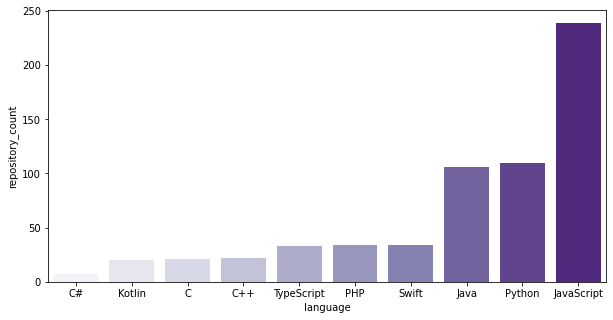

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'language', y = 'repository_count', data = df_language_count, palette = 'Purples')

plt.show()

In terms of the number of repositories created, JavaScript is by far the most popular coding language overall. It is followed by Java and Python which are almost equal. Likewise PHP, Swift, TypeSCript are almost equal. C++, C, and Kotlin, are next at almost equal levels. Finally C# is the least popular overall language in the data set. 

Look at the median and mean of the interactions with each reposotory forks_count, stargazers_count, watchers_count, watchers)

In [ ]:
df_grouped_languages[['forks_count', 'stargazers_count', 'watchers_count',	'watchers']].agg(['median', 'mean'])

forks_count             ... watchers            
                median       mean  ...   median        mean
language                           ...                     
C                   20  28.857143  ...    152.0  177.809524
C#                  27  32.000000  ...    151.0  166.714286
C++                 49  52.363636  ...    197.5  208.363636
Java                30  38.518868  ...    172.0  187.066038
JavaScript          15  25.108787  ...    174.0  192.405858
Kotlin              18  20.950000  ...    152.0  177.900000
PHP                 16  29.470588  ...    156.5  184.411765
Python              31  40.781818  ...    161.5  176.409091
Swift               15  18.058824  ...    161.0  173.764706
TypeScript          13  28.757576  ...    171.0  194.303030

[10 rows x 8 columns]

stargazers_count, watchers_count, watchers all have exact same value. From here stargazers_count and watchers will be drop. Analysis will be carried out on forks_count and watchers_count.

Create box plots for each language for the forks_count and watchers_count to show the distribution of the data.

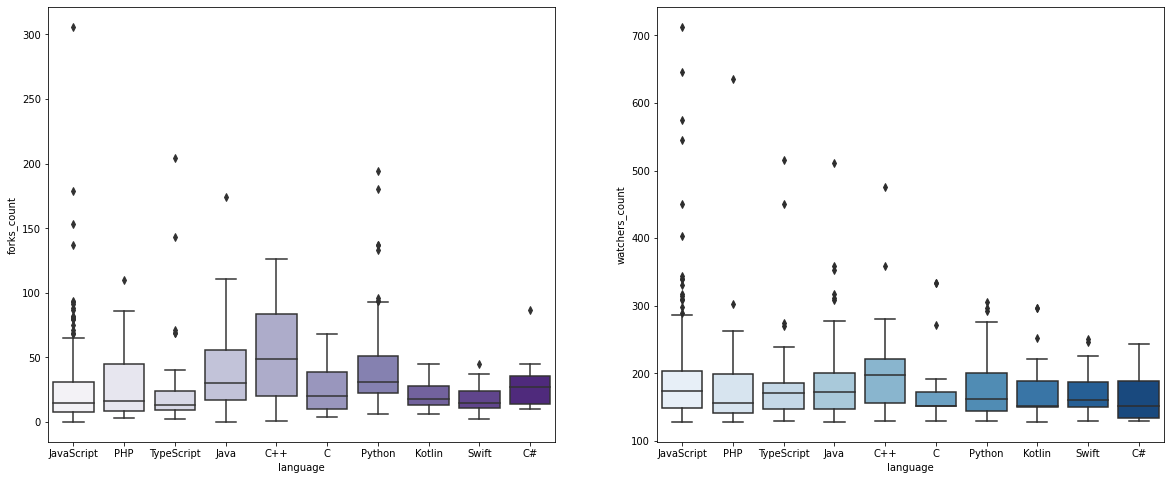

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.boxplot(x="language", y="forks_count", data=df_languages, palette="Purples")

plt.subplot(1,2,2)
sns.boxplot(x="language", y="watchers_count", data=df_languages, palette="Blues")

It's difficult to compare the two metics (forks and watchers) this way. Some languages seem to track well (JavaScript, Python, PHP) while others do not (C++, C).

Try to look at the distribution instead using histograms.

In [ ]:
df_python = df_grouped_languages.get_group('Python')
df_javascript = df_grouped_languages.get_group('JavaScript')
df_java = df_grouped_languages.get_group('Java')

df_csharpe = df_grouped_languages.get_group('C#')
df_c = df_grouped_languages.get_group('C')
df_cplusplus = df_grouped_languages.get_group('C++')

df_swift = df_grouped_languages.get_group('Swift')
df_php = df_grouped_languages.get_group('PHP')
df_typeccript = df_grouped_languages.get_group('TypeScript')
df_kotlin = df_grouped_languages.get_group('Kotlin')


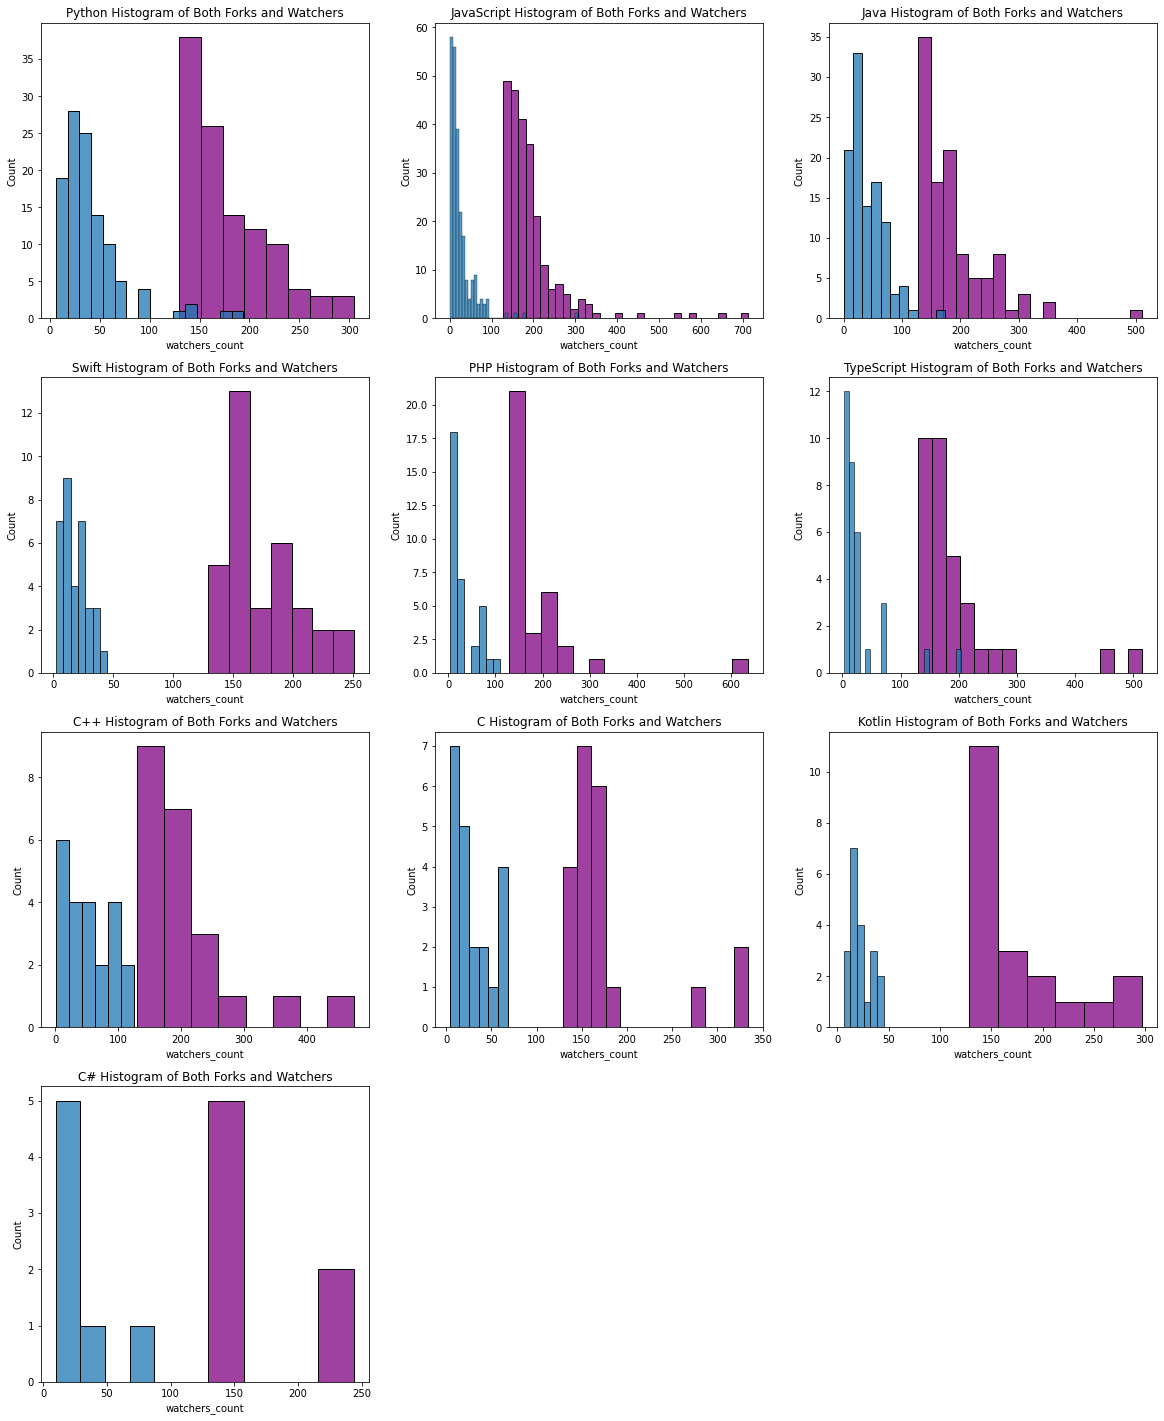

In [ ]:
plt.figure(figsize=(20,25))

plt.subplot(4,3,1)
sns.histplot(df_python["watchers_count"], kde = False, color='purple')
sns.histplot(df_python["forks_count"], kde = False).set_title("Python Histogram of Both Forks and Watchers")

plt.subplot(4,3,2)
sns.histplot(df_javascript["watchers_count"], kde = False, color='purple')
sns.histplot(df_javascript["forks_count"], kde = False).set_title("JavaScript Histogram of Both Forks and Watchers")

plt.subplot(4,3,3)
sns.histplot(df_java["watchers_count"], kde = False, color='purple')
sns.histplot(df_java["forks_count"], kde = False).set_title("Java Histogram of Both Forks and Watchers")

plt.subplot(4,3,4)
sns.histplot(df_swift["watchers_count"], kde = False, color='purple')
sns.histplot(df_swift["forks_count"], kde = False).set_title("Swift Histogram of Both Forks and Watchers")

plt.subplot(4,3,5)
sns.histplot(df_php["watchers_count"], kde = False, color='purple')
sns.histplot(df_php["forks_count"], kde = False).set_title("PHP Histogram of Both Forks and Watchers")

plt.subplot(4,3,6)
sns.histplot(df_typeccript["watchers_count"], kde = False, color='purple')
sns.histplot(df_typeccript["forks_count"], kde = False).set_title("TypeScript Histogram of Both Forks and Watchers")

plt.subplot(4,3,7)
sns.histplot(df_cplusplus["watchers_count"], kde = False, color='purple')
sns.histplot(df_cplusplus["forks_count"], kde = False).set_title("C++ Histogram of Both Forks and Watchers")

plt.subplot(4,3,8)
sns.histplot(df_c["watchers_count"], kde = False, color='purple')
sns.histplot(df_c["forks_count"], kde = False).set_title("C Histogram of Both Forks and Watchers")

plt.subplot(4,3,9)
sns.histplot(df_kotlin["watchers_count"], kde = False, color='purple')
sns.histplot(df_kotlin["forks_count"], kde = False).set_title("Kotlin Histogram of Both Forks and Watchers")

plt.subplot(4,3,10)
sns.histplot(df_csharpe["watchers_count"], kde = False, color='purple')
sns.histplot(df_csharpe["forks_count"], kde = False).set_title("C# Histogram of Both Forks and Watchers")

plt.show()

The distribution of forks and watchers seems to track well for the languages with a larger number of data. For languages with less entries (C#) it is not possible to see this relationship.

Look at forks_count and watchers_count over the years for each language. To do this the data is grouped by language and year. The average of forks_count and watchers_count are found. 

In [ ]:
df_languages_year_group = df_languages.groupby(['language', 'year']).agg({'forks_count': 'mean', 'watchers_count': 'mean'})
df_languages_year_group['year'] = df_languages_year_group.index.get_level_values(1)

df_languages_year_group

forks_count  watchers_count  year
language   year                                   
C          2017    33.083333      197.833333  2017
           2018    23.222222      151.111111  2018
C#         2018    39.200000      173.000000  2018
           2019    14.000000      151.000000  2019
C++        2017    50.636364      175.181818  2017
           2018    65.875000      235.000000  2018
           2019     1.000000      476.000000  2019
           2020    33.500000      150.500000  2020
Java       2017    41.839506      191.580247  2017
           2018    29.181818      172.727273  2018
           2019    17.333333      170.333333  2019
JavaScript 2017    29.524476      193.923077  2017
           2018    21.310811      198.324324  2018
           2019    10.050000      160.100000  2019
           2020     0.500000      188.000000  2020
Kotlin     2017    21.142857      180.285714  2017
           2018    20.500000      172.333333  2018
PHP        2017    37.650000      198.700000  2017
           2018    17.785714      164.000000  2018
Python     2017    44.707692      173.446154  2017
           2018    35.100000      180.550000  2018
           2019    35.200000      181.800000  2019
Swift      2017    19.130435      172.304348  2017
           2018    17.222222      177.555556  2018
           2019     9.500000      173.500000  2019
TypeScript 2017    35.777778      207.055556  2017
           2018    31.375000      162.875000  2018
           2019     8.166667      202.833333  2019
           2020     5.000000      165.000000  2020

In [ ]:
df_languages.groupby(['language', 'year']).size().to_frame()

0
language   year     
C          2017   12
           2018    9
C#         2018    5
           2019    2
C++        2017   11
           2018    8
           2019    1
           2020    2
Java       2017   81
           2018   22
           2019    3
JavaScript 2017  143
           2018   74
           2019   20
           2020    2
Kotlin     2017   14
           2018    6
PHP        2017   20
           2018   14
Python     2017   65
           2018   40
           2019    5
Swift      2017   23
           2018    9
           2019    2
TypeScript 2017   18
           2018    8
           2019    6
           2020    1

This reveals the shortcoming of the current data. The sample size was small provided by the GitHub API was small and as a result does not contain data for each language for each year (even though this data absolutely does exist). Below this data is plotted as language per year as an exercise in how it is done. However this data set is not sufficent for use and will be abandoned. 

I want to show the mean number of forks and watchers per on the same graph. To do this it is necessary to melt down the forks_count and watchers_count columns so that they can be treated as hue when plotting.

In [ ]:
df_year_typescript = df_languages_year_group.loc['TypeScript']
df_year_typescript_melt = df_year_typescript.melt('year', var_name='Forked&Watched', value_name="Count")
df_year_typescript_melt

,year,Forked&Watched,Count
0,2017,forks_count,35.777778
1,2018,forks_count,31.375000
2,2019,forks_count,8.166667
3,2020,forks_count,5.000000
4,2017,watchers_count,207.055556
5,2018,watchers_count,162.875000
6,2019,watchers_count,202.833333
7,2020,watchers_count,165.000000


In [ ]:
df_year_javacript = df_languages_year_group.loc['JavaScript']
df_year_javacript_melt = df_year_javacript.melt('year', var_name='Forked&Watched', value_name="Count")

df_year_python = df_languages_year_group.loc['Python']
df_year_python_melt = df_year_python.melt('year', var_name='Forked&Watched', value_name="Count")

df_year_java = df_languages_year_group.loc['Java']
df_year_java_melt = df_year_java.melt('year', var_name='Forked&Watched', value_name="Count")

df_year_csharpe = df_languages_year_group.loc['C#']
df_year_csharpe_melt = df_year_csharpe.melt('year', var_name='Forked&Watched', value_name="Count")

df_year_c = df_languages_year_group.loc['C']
df_year_c_melt = df_year_c.melt('year', var_name='Forked&Watched', value_name="Count")

df_year_cplusplus = df_languages_year_group.loc['C++']
df_year_cplusplus_melt = df_year_cplusplus.melt('year', var_name='Forked&Watched', value_name="Count")

df_year_swift = df_languages_year_group.loc['Swift']
df_year_swift_melt = df_year_swift.melt('year', var_name='Forked&Watched', value_name="Count")

df_year_php = df_languages_year_group.loc['PHP']
df_year_php_melt = df_year_php.melt('year', var_name='Forked&Watched', value_name="Count")

df_year_kotlin = df_languages_year_group.loc['Kotlin']
df_year_kotlin_melt = df_year_kotlin.melt('year', var_name='Forked&Watched', value_name="Count")

Display the means of forks and watechers over the years. 

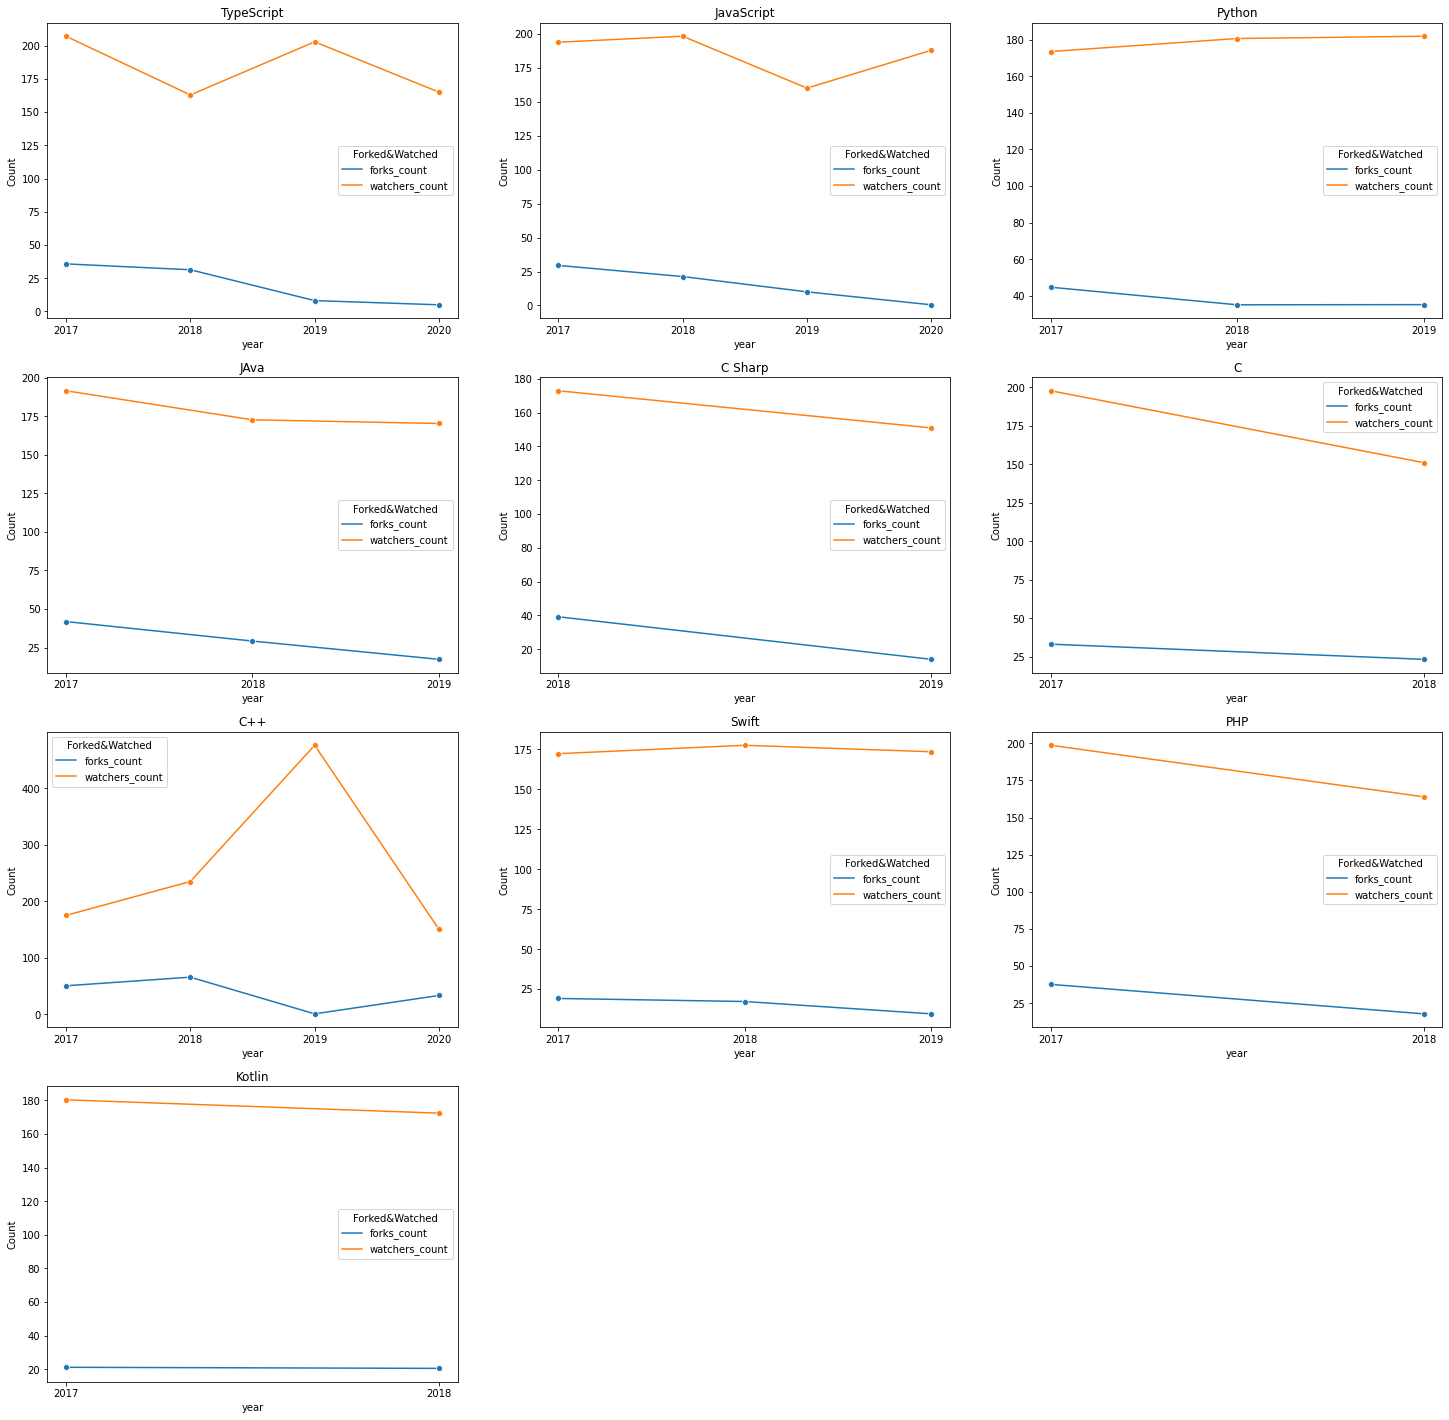

In [ ]:
plt.figure(figsize=(25,25))

plt.subplot(4,3,1)
sns.lineplot(x='year', y='Count', hue='Forked&Watched', data=df_year_typescript_melt, marker="o").set_title('TypeScript')

plt.subplot(4,3,2)
sns.lineplot(x='year', y='Count', hue='Forked&Watched', data=df_year_javacript_melt, marker="o").set_title('JavaScript')

plt.subplot(4,3,3)
sns.lineplot(x='year', y='Count', hue='Forked&Watched', data=df_year_python_melt, marker="o").set_title('Python')

plt.subplot(4,3,4)
sns.lineplot(x='year', y='Count', hue='Forked&Watched', data=df_year_java_melt, marker="o").set_title('JAva')

plt.subplot(4,3,5)
sns.lineplot(x='year', y='Count', hue='Forked&Watched', data=df_year_csharpe_melt, marker="o").set_title('C Sharp')

plt.subplot(4,3,6)
sns.lineplot(x='year', y='Count', hue='Forked&Watched', data=df_year_c_melt, marker="o").set_title('C')

plt.subplot(4,3,7)
sns.lineplot(x='year', y='Count', hue='Forked&Watched', data=df_year_cplusplus_melt, marker="o").set_title('C++')

plt.subplot(4,3,8)
sns.lineplot(x='year', y='Count', hue='Forked&Watched', data=df_year_swift_melt, marker="o").set_title('Swift')

plt.subplot(4,3,9)
sns.lineplot(x='year', y='Count', hue='Forked&Watched', data=df_year_php_melt, marker="o").set_title('PHP')

plt.subplot(4,3,10)
sns.lineplot(x='year', y='Count', hue='Forked&Watched', data=df_year_kotlin_melt, marker="o").set_title('Kotlin')

plt.show()